# Install Dependencies and Setup

In [1]:
import tensorflow as tf
import os

# Remove unwanted data

In [53]:
import cv2
import imghdr

In [3]:
data_dir = 'data'

In [4]:
os.listdir(data_dir)

['happy', 'sad']

In [6]:
image_exts = ['jpeg', 'jpg', 'png', 'bmp']

In [7]:
for image_class in os.listdir(data_dir):
    print(image_class)

happy
sad


In [8]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)

        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)

            if tip not in image_exts:
                print("Image not in ext list {}".format(image_path))
                os.remove(image_path)
        
        except Exception as e:
            print('Issue with image {}'.format(image_path))

Image not in ext list data\happy\427394C200000578-0-image-a-24_1500384481554.jpg
Image not in ext list data\happy\where-to-watch-shiny-happy-people.jpg
Image not in ext list data\sad\39843138-sad-man.jpg
Image not in ext list data\sad\crying-sad.gif
Image not in ext list data\sad\depositphotos_11207956-stock-photo-thoughtful-man-in-the-living.jpg
Image not in ext list data\sad\depositphotos_86851530-stock-photo-close-up-of-african-young.jpg
Image not in ext list data\sad\strated-depressed-man-sitting-on-plastic-stool-3d-white-people-man-character.jpg
Image not in ext list data\sad\very-sad-man-sitting-alone-on-white-background-depressed-young-man-sitting-businessman-vector.jpg


# Load the data

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 171 files belonging to 2 classes.


In [11]:
data_iterator = data.as_numpy_iterator()

In [12]:
batch = data_iterator.next()

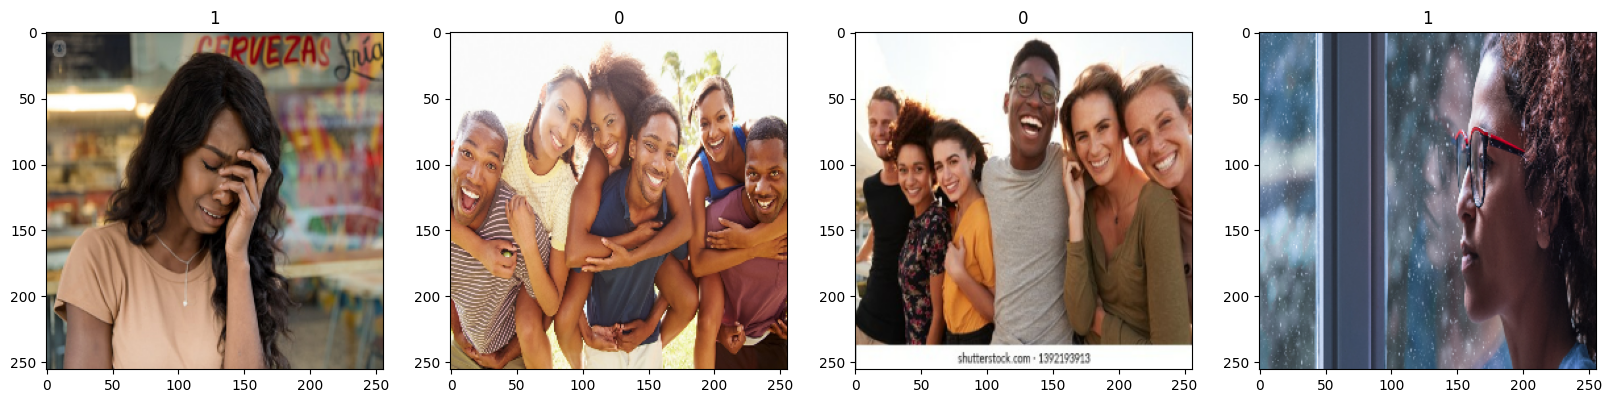

In [13]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Scale the data

In [14]:
data = data.map(lambda x, y: (x/255, y))

In [15]:
data.as_numpy_iterator().next()

(array([[[[0.8980392 , 0.6745098 , 0.60784316],
          [0.8980392 , 0.6745098 , 0.60784316],
          [0.89411765, 0.6666667 , 0.6117647 ],
          ...,
          [0.91764706, 0.72156864, 0.6784314 ],
          [0.91764706, 0.72156864, 0.6784314 ],
          [0.91764706, 0.72156864, 0.6862745 ]],
 
         [[0.8980392 , 0.6745098 , 0.60784316],
          [0.8980392 , 0.6741422 , 0.60857844],
          [0.8980392 , 0.67058825, 0.6156863 ],
          ...,
          [0.91764706, 0.7254902 , 0.67058825],
          [0.91764706, 0.72156864, 0.6784314 ],
          [0.91764706, 0.72156864, 0.6862745 ]],
 
         [[0.8980392 , 0.6745098 , 0.60784316],
          [0.89781517, 0.6703642 , 0.61546224],
          [0.90066826, 0.6732173 , 0.61831534],
          ...,
          [0.91764706, 0.7254902 , 0.67058825],
          [0.91764706, 0.72156864, 0.6784314 ],
          [0.91764706, 0.72156864, 0.6784314 ]],
 
         ...,
 
         [[0.84313726, 0.6156863 , 0.5684781 ],
          [0.85490

# Split the data

In [16]:
# calcluate

len(data)

6

In [28]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1) + 1

In [30]:
train_size + val_size + test_size

6

In [31]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [32]:
print(
    len(train),
    len(test),
    len(val),
)

4 1 1


# Build Deep Learning Model

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [35]:
model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)))  
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [36]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# Train the model

In [38]:
logdir = 'logs'

In [39]:
tesorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [40]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tesorboard_callback])

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 809ms/step - accuracy: 0.5083 - loss: 1.0904 - val_accuracy: 0.5000 - val_loss: 1.0154
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 860ms/step - accuracy: 0.4573 - loss: 0.8330 - val_accuracy: 0.5000 - val_loss: 0.6741
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 990ms/step - accuracy: 0.6000 - loss: 0.5879 - val_accuracy: 0.5625 - val_loss: 0.6057
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.6458 - loss: 0.5477 - val_accuracy: 0.8438 - val_loss: 0.5045
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 990ms/step - accuracy: 0.8188 - loss: 0.4785 - val_accuracy: 0.9375 - val_loss: 0.4084
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.8583 - loss: 0.4298 - val_accuracy: 0.7500 - val_loss: 0.4777
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.8208 - loss: 0.3948 - val_accuracy: 0.9688 - val_loss: 0.2585
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.8927 - loss: 0.3413 - val_accuracy: 0.9062 - val_loss: 0.3253
Epoc

# Plot model performance

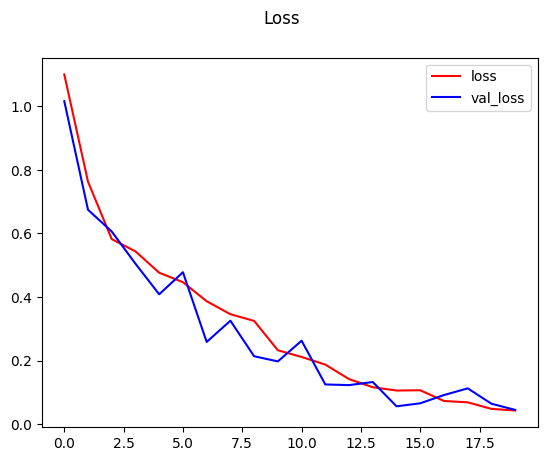

In [41]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'red', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'blue', label = 'val_loss')
fig.suptitle('Loss')
plt.legend()
plt.show()

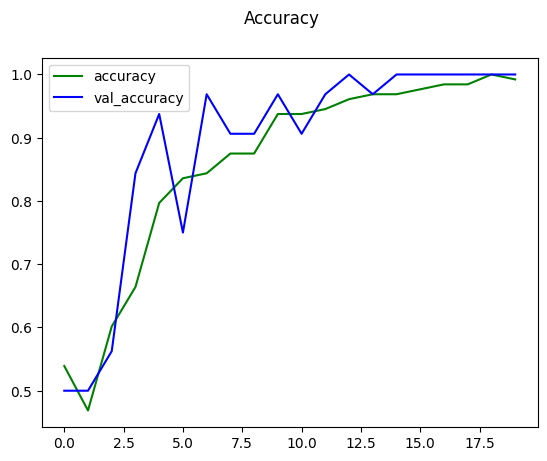

In [42]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'green', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'blue', label = 'val_accuracy')
fig.suptitle('Accuracy')
plt.legend()
plt.show()

# Evaluate the model

In [43]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [44]:
precision = Precision()
recall = Recall()
acc = BinaryAccuracy()

In [45]:
for batch in test.as_numpy_iterator():
    x, y = batch
    yhat = model.predict(x)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


In [46]:
print(precision.result())
print(recall.result())
print(acc.result())

tf.Tensor(0.75, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(0.90909094, shape=(), dtype=float32)


# Testing the model

In [47]:
import cv2

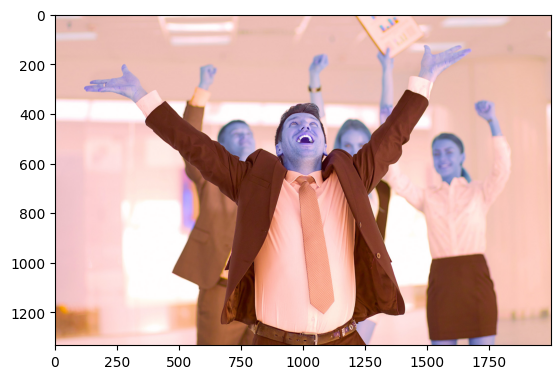

In [48]:
img = cv2.imread('data/happy/170404-happy-workers-feature.jpg')
plt.imshow(img)
plt.show()

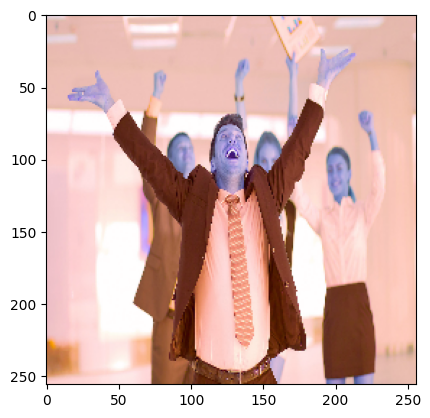

In [49]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [50]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


In [51]:
yhat

array([[0.04237584]], dtype=float32)

In [52]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# Save the Model

In [54]:
from tensorflow.keras.models import load_model

In [ ]:
# .h5 format for older keras version
model.save(os.path.join('model', 'img_classifier.h5'))

In [61]:
# for new standard version
model.save(os.path.join('model', 'img_classifier.keras'))  